In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import numpy.linalg as la

from data import *
from models import train, RNN, FittedRNN, OneDimEquivalent
import plotter as pt

from pydoc import help

# Below snippit taken from PyTorch quickstart tutorial
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cpu


In [44]:
sd_dataset = SingleDecisionDataset(32000)
train_dataloader = DataLoader(sd_dataset, batch_size=32)

model = RNN()
loss_hist = train(train_dataloader, model, device)

loss: 0.998023  [   32/32000]
loss: 0.883395  [ 3232/32000]
loss: 0.000549  [ 6432/32000]
loss: 0.000525  [ 9632/32000]
loss: 0.000239  [12832/32000]
loss: 0.000406  [16032/32000]
loss: 0.000323  [19232/32000]
loss: 0.000437  [22432/32000]
loss: 0.000181  [25632/32000]
loss: 0.000947  [28832/32000]


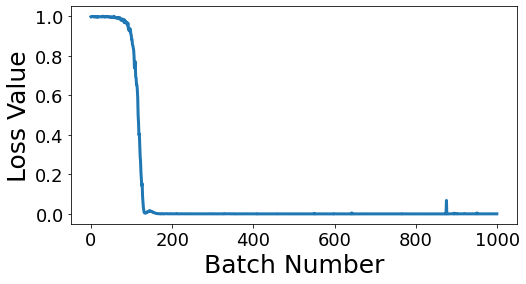

In [45]:
loss_hist = np.array(loss_hist)

SMALL_SIZE = 18
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  
plt.figure(figsize=(8, 4))
plt.ylabel("Loss Value")
plt.xlabel("Batch Number")
plt.yscale('linear')
plt.plot(loss_hist, linewidth=3)

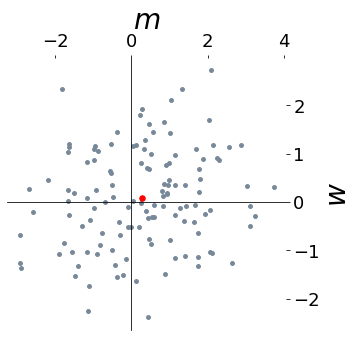

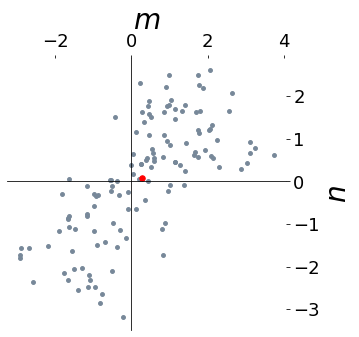

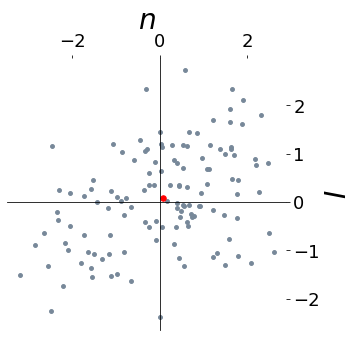

In [46]:
SMALL_SIZE = 18
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

m = model.m.detach().numpy().squeeze()
n = model.n.detach().numpy().squeeze()
wi = model.wi.detach().numpy().squeeze()
w = model.wi.detach().numpy().squeeze()
    
pt.plot_scatter(m, w, xlabel="$m$", ylabel="$w$")
    
pt.plot_scatter(m, n, xlabel="$m$", ylabel="$n$")

pt.plot_scatter(n, wi, xlabel="$n$", ylabel="$I$")

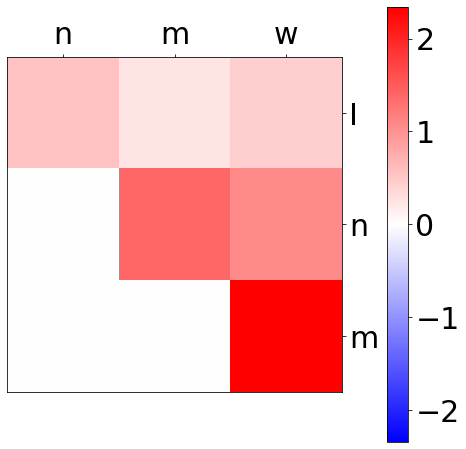

In [48]:
SMALL_SIZE = 30
MEDIUM_SIZE = 28
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)  

pt.visCov(model, flip_m_n=False)

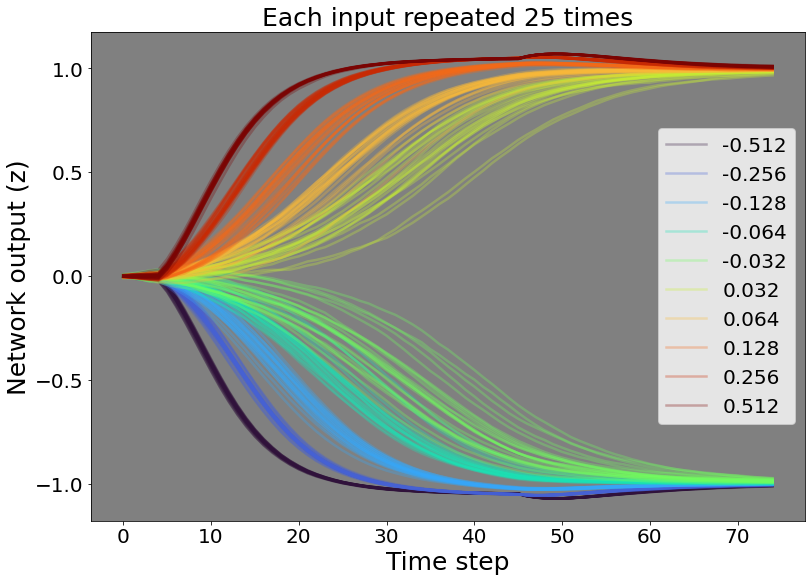

In [50]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

pt.plot_input_range(model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

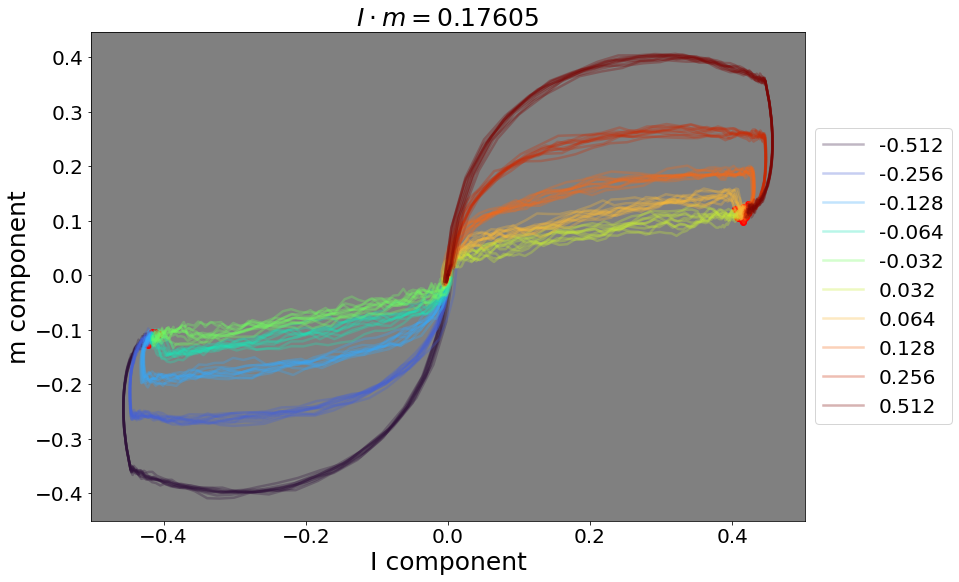

In [49]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
LARGE_SIZE = 30

plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)

pt.plot_network_in_ax1_ax2(model, 
                    single_decision,  
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]), 
                    "I", "m",
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

torch.Size([75])
torch.Size([75])


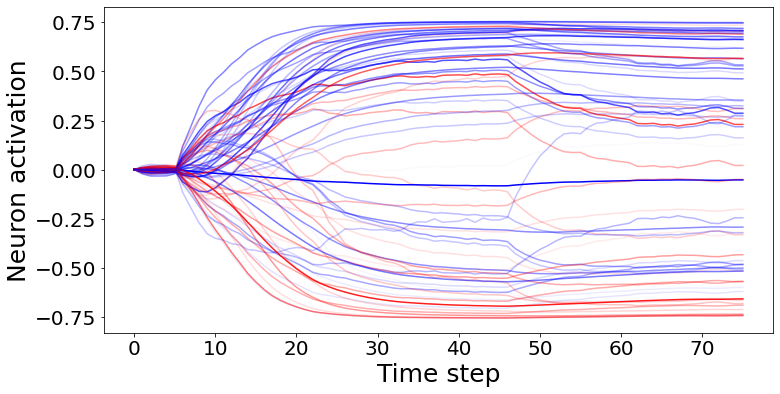

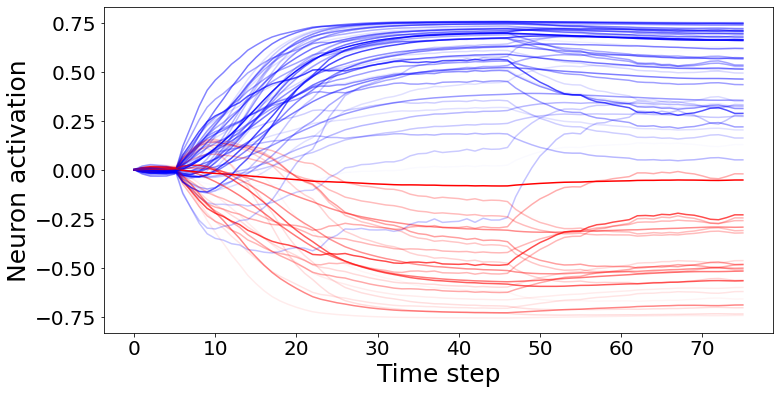

In [60]:
u, y = single_decision(8*3.2/100)
u, y = torch.tensor(u, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
pt.plot_neuron_states(model, u, y, figsize=(12, 6), apply_activation=True, plot_by='weight')
pt.plot_neuron_states(model, u, y, figsize=(12, 6), apply_activation=True, plot_by='adj_weight')

In [56]:
fit_model = FittedRNN(model)

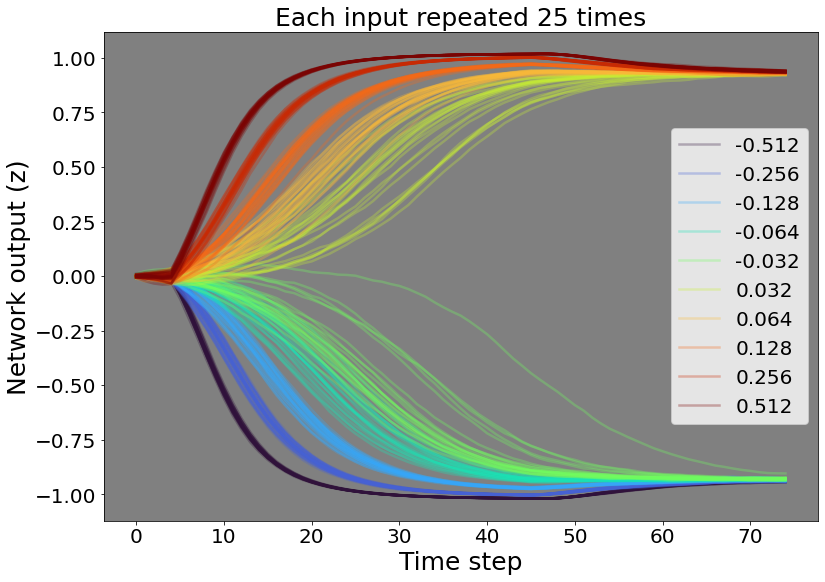

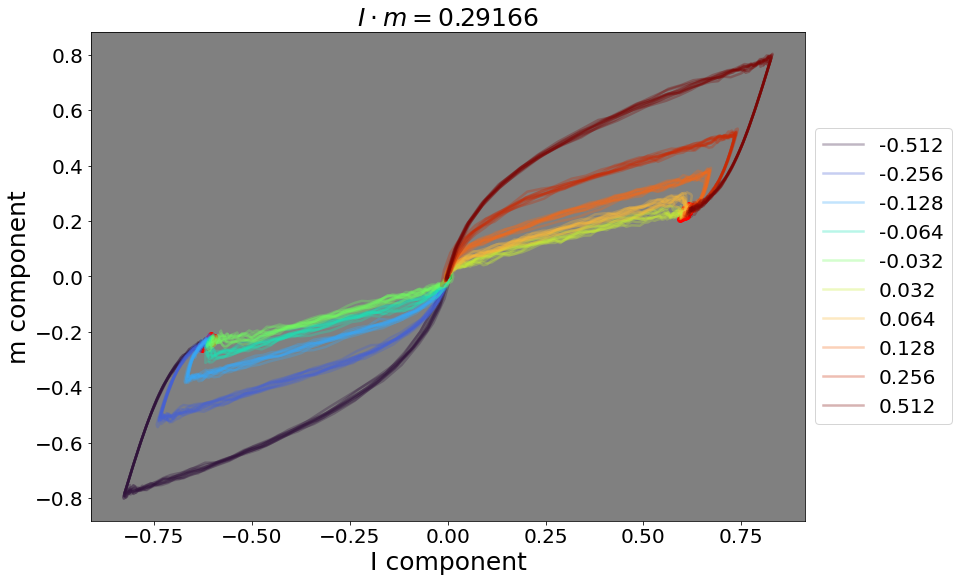

In [57]:
pt.plot_input_range(fit_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)

pt.plot_network_in_ax1_ax2(fit_model, 
                    single_decision, 
                    (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                    "I", "m",
                    num_repeat=10,
                    alpha=0.3,
                    figsize=(16,9))

torch.Size([75])
torch.Size([75])


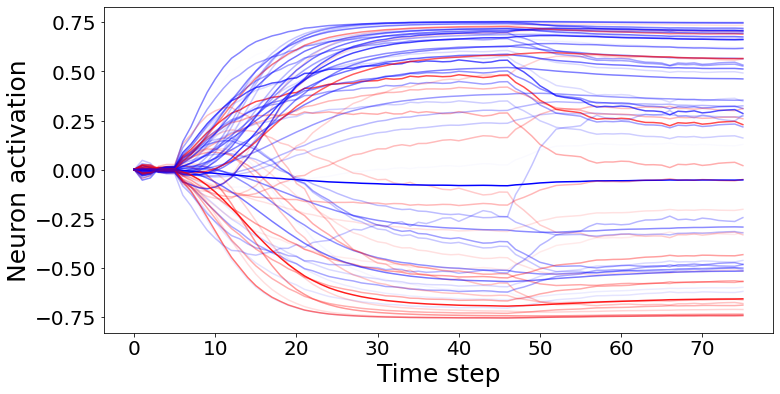

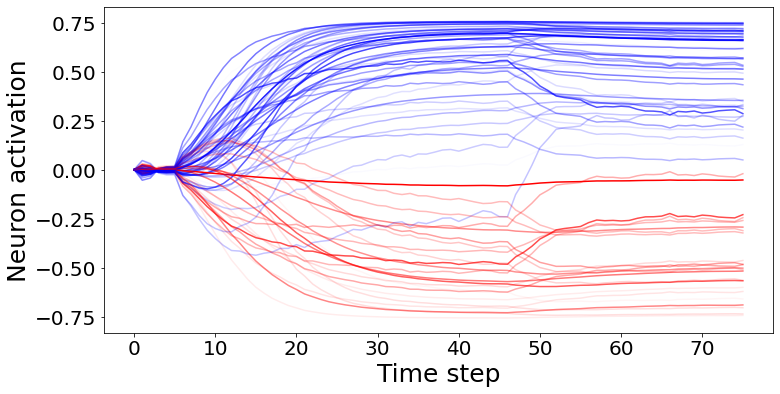

In [61]:
u, y = single_decision(8*3.2/100)
u, y = torch.tensor(u, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
pt.plot_neuron_states(model, u, y, figsize=(12, 6), apply_activation=True, plot_by='weight')
pt.plot_neuron_states(model, u, y, figsize=(12, 6), apply_activation=True, plot_by='adj_weight')

In [24]:
dim_model = OneDimEquivalent(model)

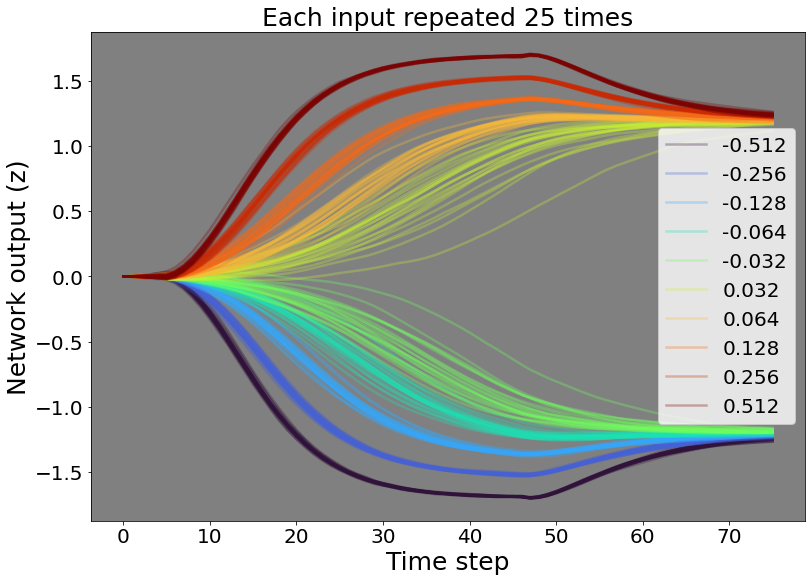

In [25]:
pt.plot_input_range(dim_model, 
                single_decision, 
                (3.2/100)*np.array([-16, -8, -4, -2, -1, 1, 2, 4, 8, 16]),
                alpha=0.3,
                num_repeat=25,
                figsize=(16, 9),
                linewidth=2.5)